### [D0828 과제]
- 데이터셋 : auto-mpg.csv
- 목적 : 연비예측
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

[1] 데이터 준비

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_FILE = '../Data/auto_mpg.csv'

In [3]:
mpgDF=pd.read_csv(DATA_FILE)
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
mpgDF.drop('car name', axis=1, inplace=True)
mpgDF.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [5]:
mpgDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
mpgDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [7]:
mpgDF['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [9]:
mpgDF.shape

(398, 8)

In [8]:
mask = mpgDF['horsepower'] == '?'

In [10]:
nopower = mpgDF[mask]
mpgDF.drop(index=nopower.index, inplace=True)
mpgDF.shape

(392, 8)

In [11]:
mpgDF['horsepower(num)'] = pd.to_numeric(mpgDF['horsepower'])

In [12]:
mpgDF.drop('horsepower', axis=1, inplace=True)

In [13]:
mpgDF_corr=mpgDF.corr()
mpgDF_corr

,mpg,cylinders,displacement,weight,acceleration,model year,origin,horsepower(num)
mpg,1.000000,-0.777618,-0.805127,-0.832244,0.423329,0.580541,0.565209,-0.778427
cylinders,-0.777618,1.000000,0.950823,0.897527,-0.504683,-0.345647,-0.568932,0.842983
displacement,-0.805127,0.950823,1.000000,0.932994,-0.543800,-0.369855,-0.614535,0.897257
weight,-0.832244,0.897527,0.932994,1.000000,-0.416839,-0.309120,-0.585005,0.864538
acceleration,0.423329,-0.504683,-0.543800,-0.416839,1.000000,0.290316,0.212746,-0.689196
model year,0.580541,-0.345647,-0.369855,-0.309120,0.290316,1.000000,0.181528,-0.416361
origin,0.565209,-0.568932,-0.614535,-0.585005,0.212746,0.181528,1.000000,-0.455171
horsepower(num),-0.778427,0.842983,0.897257,0.864538,-0.689196,-0.416361,-0.455171,1.000000


<Axes: >

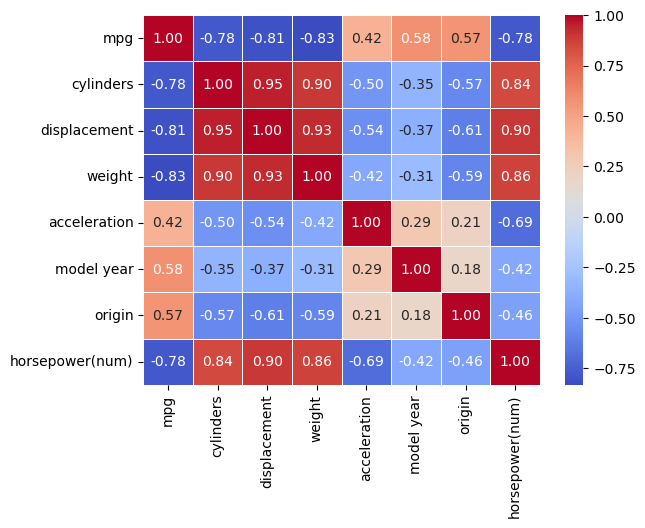

In [14]:
sns.heatmap(mpgDF_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

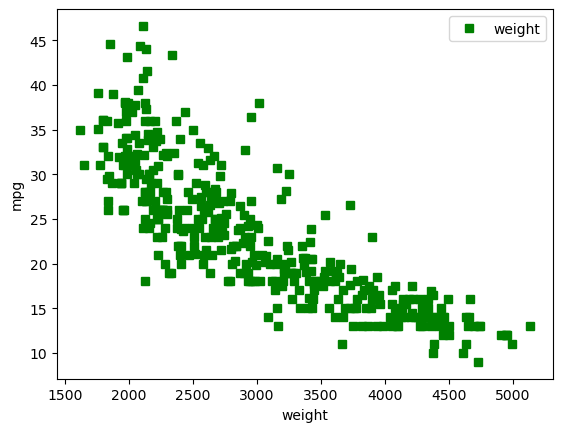

In [15]:
# 현재 데이터의 분포 확인 (weight-mpg)

plt.plot(mpgDF['weight'], mpgDF['mpg'], 'gs', label='weight')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.legend()
plt.show()

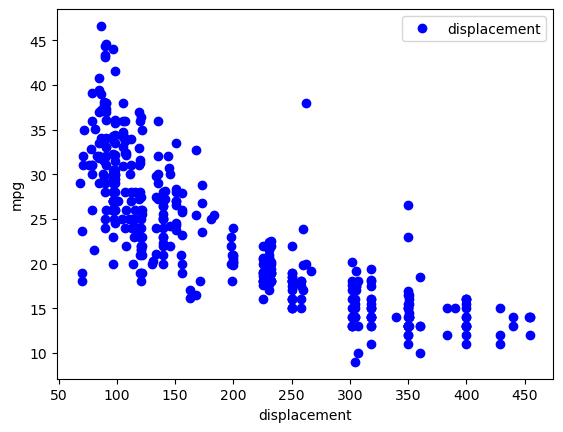

In [16]:
# 현재 데이터의 분포 확인 (displacements-mpg)

plt.plot(mpgDF['displacement'], mpgDF['mpg'], 'bo', label='displacement')
plt.xlabel('displacement')
plt.ylabel('mpg')
plt.legend()
plt.show()

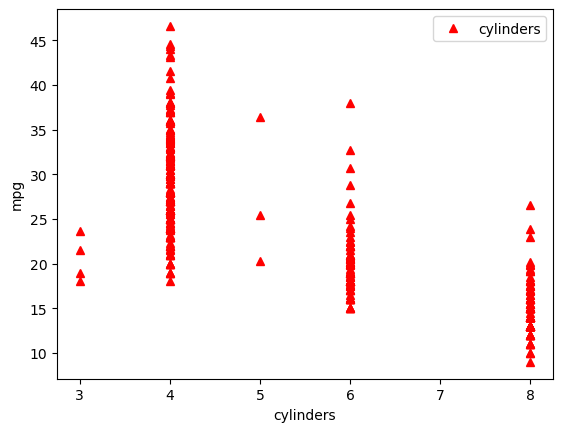

In [17]:
# 현재 데이터의 분포 확인 (cylinders-mpg)

plt.plot(mpgDF['cylinders'], mpgDF['mpg'], 'r^', label='cylinders')
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [18]:
### 학습용 데이터셋 구성 ==> 피쳐와 타겟
### 피쳐: weight, displacement / 타겟: mpg

dataDF=pd.DataFrame({'weight':mpgDF['weight'], 'displacement':mpgDF['displacement']})
mpgSR=pd.Series(mpgDF['mpg'])

In [19]:
dataDF

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0
...,...,...
393,2790,140.0
394,2130,97.0
395,2295,135.0
396,2625,120.0


In [20]:
mpgSR

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [21]:
dataDF.shape, mpgSR.shape

((392, 2), (392,))

[2] 학습 진행 - 다중 선형 회귀

In [22]:
# 모듈 로딩
from sklearn.linear_model import LinearRegression

In [23]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

# 학습 진행
model.fit(dataDF, mpgSR)

LinearRegression()

In [24]:
# 학습 후 모델 파라미터
print(f'기울기 ({len(model.coef_)}개) : {model.coef_}')
print(f'절편 : {model.intercept_}')

기울기 (2개) : [-0.00575113 -0.01649711]
절편 : 43.77761939549803


In [25]:
# y=ax+bx+c
pre_mpg = model.coef_[0]*mpgDF['weight'] + model.coef_[1]*mpgDF['displacement'] + model.intercept_
pre_mpg

0      18.561057
1      16.764719
2      18.770666
3      19.018879
4      18.959855
         ...    
393    25.422379
394    29.927499
395    28.351673
396    26.701258
397    26.171398
Length: 392, dtype: float64

In [26]:
pre_mpg=pre_mpg.values.reshape(-1)
pre_mpg

array([18.56105739, 16.76471868, 18.77066584, 19.01887875, 18.95985493,
       11.73471667, 11.24752429, 11.72003116, 10.82269715, 15.20190735,
       16.96796061, 17.41278445, 15.54878658, 18.52345641, 28.27177248,
       24.2182486 , 24.54106799, 25.60003166, 29.92749899, 31.6240815 ,
       26.59592566, 28.03718976, 28.40299308, 28.93345115, 25.26571001,
       11.29720835, 13.54607452, 13.33009956, 11.54816458, 29.92749899,
       28.44747227, 29.09993479, 24.80182119, 20.2876436 , 20.50783986,
       20.66312029, 21.04058404, 13.79713707, 11.50574419, 14.09695195,
       14.97492192,  8.96239162,  9.88392634,  7.61798224, 22.48652665,
       27.61930996, 20.77814284, 21.60055402, 28.99746982, 29.65431181,
       30.54651008, 30.44979624, 32.40957622, 33.31325945, 31.62983263,
       31.0329289 , 28.81237843, 29.94225495, 29.21435923, 27.61930996,
       28.96296306, 13.4233138 , 11.96008324, 14.75062796, 14.24073013,
       17.64435936, 10.05538754, 12.11205681, 12.37660866, 11.74

In [27]:
pre_mpg.shape

(392,)

In [32]:
# 실제 점수와 예측 점수의 차이 확인
origin_mpg = mpgSR.to_numpy()

In [33]:
origin_mpg

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [34]:
delta_mpg = origin_mpg - pre_mpg
delta_mpg

array([ -0.56105739,  -1.76471868,  -0.77066584,  -3.01887875,
        -1.95985493,   3.26528333,   2.75247571,   2.27996884,
         3.17730285,  -0.20190735,  -1.96796061,  -3.41278445,
        -0.54878658,  -4.52345641,  -4.27177248,  -2.2182486 ,
        -6.54106799,  -4.60003166,  -2.92749899,  -5.6240815 ,
        -1.59592566,  -4.03718976,  -3.40299308,  -2.93345115,
        -4.26571001,  -1.29720835,  -3.54607452,  -2.33009956,
        -2.54816458,  -2.92749899,  -0.44747227,  -4.09993479,
        -5.80182119,  -4.2876436 ,  -3.50783986,  -1.66312029,
        -3.04058404,   0.20286293,   2.49425581,  -0.09695195,
        -0.97492192,   3.03760838,   3.11607366,   5.38201776,
        -4.48652665,  -5.61930996,  -1.77814284,  -3.60055402,
        -5.99746982,  -1.65431181,  -0.54651008,  -0.44979624,
        -1.40957622,   1.68674055,  -4.62983263,  -5.0329289 ,
        -4.81237843,  -4.94225495,  -6.21435923,  -7.61930996,
        -7.96296306,  -0.4233138 ,   2.03991676,   0.24

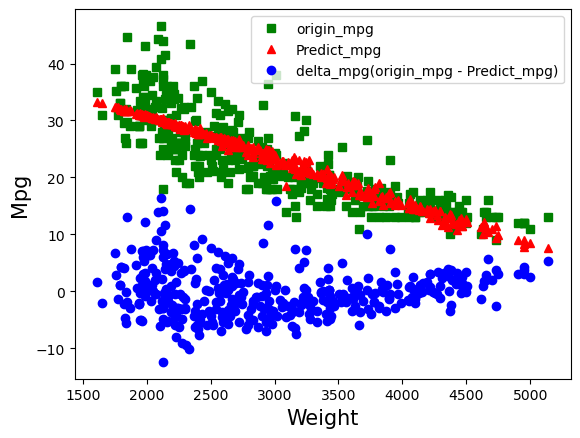

In [40]:
# 현재 데이터의 분포 확인

plt.plot(mpgDF['weight'], mpgDF['mpg'], 'gs', label='origin_mpg')
plt.plot(mpgDF['weight'], pre_mpg, 'r^', label='Predict_mpg')
plt.plot(mpgDF['weight'], delta_mpg, 'bo', label='delta_mpg(origin_mpg - Predict_mpg)')
plt.xlabel('Weight', size=15)
plt.ylabel('Mpg', size=15)
plt.legend()
plt.show()

[3] 모델 성능 평가

In [41]:
### 모듈 로딩, 손실/비용함수로 오차 계산, 결정계수
### root_mean_squared_error는 v.1.4 이상

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
dataDF

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0
...,...,...
393,2790,140.0
394,2130,97.0
395,2295,135.0
396,2625,120.0


In [43]:
mpgSR

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [44]:
# mpg => 내부에서 predict() 진행 ==> 결과로 R2 계수 추출해서 반환
score = model.score(dataDF, mpgSR)
print(f'score: {score}')

score: 0.6989667867785285


In [46]:
# 성능지표 => 오차계산과 결정계수 계산
pre_mpg = model.predict(dataDF)
pre_mpg

array([18.56105739, 16.76471868, 18.77066584, 19.01887875, 18.95985493,
       11.73471667, 11.24752429, 11.72003116, 10.82269715, 15.20190735,
       16.96796061, 17.41278445, 15.54878658, 18.52345641, 28.27177248,
       24.2182486 , 24.54106799, 25.60003166, 29.92749899, 31.6240815 ,
       26.59592566, 28.03718976, 28.40299308, 28.93345115, 25.26571001,
       11.29720835, 13.54607452, 13.33009956, 11.54816458, 29.92749899,
       28.44747227, 29.09993479, 24.80182119, 20.2876436 , 20.50783986,
       20.66312029, 21.04058404, 13.79713707, 11.50574419, 14.09695195,
       14.97492192,  8.96239162,  9.88392634,  7.61798224, 22.48652665,
       27.61930996, 20.77814284, 21.60055402, 28.99746982, 29.65431181,
       30.54651008, 30.44979624, 32.40957622, 33.31325945, 31.62983263,
       31.0329289 , 28.81237843, 29.94225495, 29.21435923, 27.61930996,
       28.96296306, 13.4233138 , 11.96008324, 14.75062796, 14.24073013,
       17.64435936, 10.05538754, 12.11205681, 12.37660866, 11.74

In [47]:
# 손실/비율 계산 함수 ==> 정답과 예측값 : 0에 가까울수록 좋음
mse=mean_squared_error(mpgSR, pre_mpg)
rmse=mean_squared_error(mpgSR, pre_mpg, squared=False)
mae=mean_absolute_error(mpgSR, pre_mpg)

# 얼마나 정답에 가깝게 값을 예측했느냐를 나타내는 지표, ==> 정답과 예측값 제공 : 1에 가까울수록 좋음
r2=r2_score(mpgSR, pre_mpg)

In [48]:
## 손실/비용함수 값은 0에 가까울수록
## 결정계수 값은 1에 가까울수록 성능 좋은 모델

print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'mae: {mae}')
print(f'r2: {r2}')

mse: 18.291602397426125
rmse: 4.276868293205453
mae: 3.256426863668596
r2: 0.6989667867785285
